<a href="https://colab.research.google.com/github/fercouri/Calculo-Numerico/blob/main/AP2_Maria_e_Gabriella.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importações

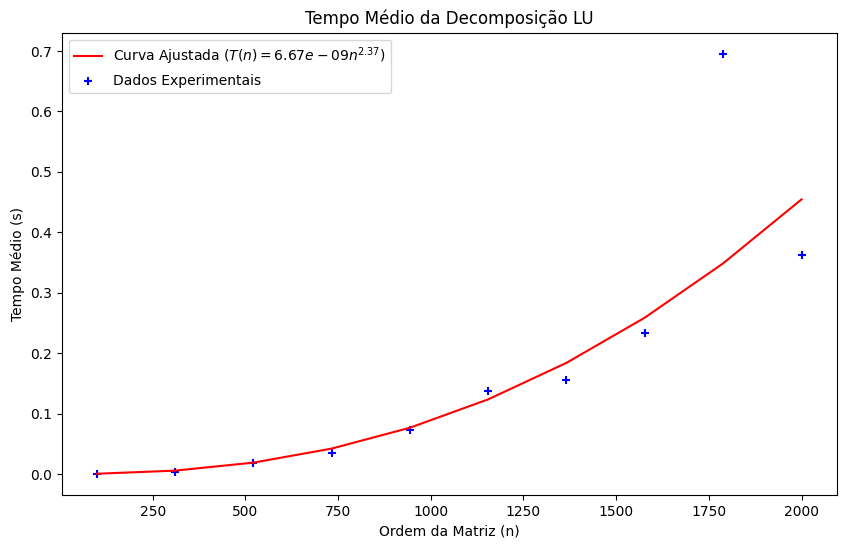

RMSE do ajuste: 1.14e-01
Coeficiente b ajustado: 2.37


In [ ]:
import numpy as np
from scipy.linalg import lu
import time
import matplotlib.pyplot as plt

# Função para medir o tempo médio da decomposição LU
def medir_tempo_lu(n, reps=10):
    """
    Mede o tempo médio da decomposição LU para uma matriz aleatória de ordem n.

    Args:
        n (int): Ordem da matriz.
        reps (int): Número de repetições do cálculo da decomposição LU.

    Returns:
        float: Tempo médio em segundos.
    """
    A = np.random.rand(n, n)  # Gera a matriz aleatória
    tempos = []
    for _ in range(reps):
        start_time = time.time()
        _, _, _ = lu(A)  # Decomposição LU
        tempos.append(time.time() - start_time)
    return np.mean(tempos)

# Resolver LU para diferentes tamanhos de matriz e salvar os tempos
n_values = np.linspace(100, 2000, 10, dtype=int)  # Valores de n
tempos = [medir_tempo_lu(n, reps=10) for n in n_values]

# Linearização e ajuste dos coeficientes
log_n = np.log(n_values)
log_tempos = np.log(tempos)
coef = np.polyfit(log_n, log_tempos, 1)  # Ajuste linear: log(T) = c1 + c2*log(n)
b = coef[0]
log_a = coef[1]
a = np.exp(log_a)

# Função ajustada
ajuste = lambda n: a * n**b

# Plot resultados
plt.figure(figsize=(10, 6))
plt.plot(n_values, ajuste(n_values), label=f"Curva Ajustada ($T(n) = {a:.2e}n^{{{b:.2f}}}$)", color='red')
plt.scatter(n_values, tempos, label="Dados Experimentais", color='blue', marker='+')
plt.title("Tempo Médio da Decomposição LU")
plt.xlabel("Ordem da Matriz (n)")
plt.ylabel("Tempo Médio (s)")
plt.legend()
plt.show()

# Qualidade do ajuste
residuos = tempos - ajuste(n_values)
rmse = np.sqrt(np.mean(residuos**2))
print(f"RMSE do ajuste: {rmse:.2e}")
print(f"Coeficiente b ajustado: {b:.2f}")


---
## (1) Decomposição LU

A decomposição LU permite resolver sistemas lineares $A\mathbf{x} = \mathbf{b}$ ao fatorar a matriz $A$ como o produto de duas matrizes:

$$A = L \cdot U,$$
onde:
- L : Matriz triangular inferior com elementos diagonais iguais a 1,
- U : Matriz triangular superior.

Após a decomposição, o sistema original pode ser resolvido em duas etapas:
1. Resolver $L\mathbf{y} = \mathbf{b}$ por substituição direta;
2. Resolver $U\mathbf{x} = \mathbf{y}$ por substituição retroativa.

#### Faça a sua implementação (**sem utilização de funções estabelecidas**) da Decomposição LU sem pivoteamento para uma matriz $A$:

Para fazer a Decomposição LU sem pivoteamento temos que:
1. Inicialização: Começa-se com L como uma matriz identidade (In) e U como uma cópia de A (matriz do sistema).
2. Eliminação Gaussiana: Transforma-se a matriz A em matriz triangular superior U, onde:
  * Para cada linha i > j, calcula-se o fator $m_{ij}$: $$m_{ij} = \frac{a_{ij}}{a_{jj}}$$
  * Subtrai-se da linha i um múltiplo da linha j para zerar os elementos abaixo da diagonal em U: $$a_{ik} = a_{ik} - m_{ij} a_{jk} , ∀k≥j$$
  * Os valores de $l_{ij}$ são armazenados na matriz L
3. Finalização: Após percorrer todas as colunas, obtêm-se A = LU

In [ ]:
# Faça a sua implementação (**sem utilização de funções estabelecidas**) da Decomposição LU sem pivoteamento para uma matriz $A$:
import numpy as np

def lu_decomposition(A):
    """Realiza a decomposição LU de uma matriz A.

    Args:
        A (numpy array): Matriz quadrada de entrada.

    Returns:
        L, U (numpy arrays): Matrizes triangular inferior e superior.
    """

    # Inicialização
    n = A.shape[0]
    L = np.zeros((n, n))
    U = np.copy(A)

    # Processo de decomposição LU
    for i in range(n):
        L[i, i] = 1

        # Eliminação Gaussiana
        for j in range(i+1, n):
            L[j, i] = U[j, i] / U[i, i]

            for k in range(i, n):
                U[j, k] -= L[j, i] * U[i, k]

    #Finalização
    return L, U

# Exemplo de uso
A = np.array([[4, 3, 3], [6, 3, 2], [5, 3, 1]], dtype=float)
L, U = lu_decomposition(A)
print("Matriz L:")
print(L)
print("\nMatriz U:")
print(U)

# A saída deve ser:
# Matriz L:
# [[1.   0.   0.  ]
#  [1.5  1.   0.  ]
#  [1.25 0.5  1.  ]]

# Matriz U:
# [[ 4.   3.   3. ]
#  [ 0.  -1.5 -2.5]
#  [ 0.   0.  -1.5]]

Matriz L:
[[1.   0.   0.  ]
 [1.5  1.   0.  ]
 [1.25 0.5  1.  ]]

Matriz U:
[[ 4.   3.   3. ]
 [ 0.  -1.5 -2.5]
 [ 0.   0.  -1.5]]


---
## (2) Cálculo Matriz Inversa

Utilize a função criada no código anterior para determinar a matriz inversa $A^{−1}$ de uma matriz A que seja não-singular. Teste sua implementação com algumas matrizes de exemplo e comprove que a matriz obtida para cada caso é, de fato, a matriz inversa.

Você deve criar uma função inversa que recebe $A$ como argumento e retorna a sua inversa.

Sua implementação deve:
* verificar se $A$ é invertível ou não; caso não seja, imprima uma mensagem de erro;
* utilizar a decomposição A = LU de forma eficiente.



Para determinar a matriz inversa, faz-se:
1. Decomposição LU, onde obtêm-se L (matriz triangular inferior) e U (matriz triângular superior);
2. Sendo a matriz inversa uma matriz que satisfaz: $AA^{-1}=I$, então cada coluna dela pode ser encontrada resolvendo: $AX=I$, onde X é a matriz inversa e I a matriz indentidade.
Porém, como $A=LU$, pode-se resolver com o processo abaixo sendo repetido para cada coluna $e_i$ da matriz $I$:
  * $L_y=e_i$
  * $U_x=y$
3. Depois é possível verificar a solução com a multiplicação $AA^{-1}$ que deve ser, aproximadamente, a matriz identidade. Aproximadamente porquê pequenos erros numéricos podem aparecer no processo de arredondamentos.

Além disso, para verificar se A é invertível, deve-se atender pelo menos um dos critérios abaixo:
1. Matriz deve ser quadrada.
2. Determinante diferente de zero -> Matriz A é invertível se det(a) != 0;

Fonte: https://study.com/skill/learn/how-to-determine-if-a-matrix-is-invertible-explanation.html#:~:text=of%20the%20matrix.-,If%20the%20determinant%20of%20the%20matrix%20is%20zero%20then%20the,else%20the%20matrix%20is%20invertible.&text=The%20inverse%20of%20matrix%20exists,the%20matrix%20is%20not%20zero.

In [ ]:
import numpy as np

def inversa(A):
    """Calcula a inversa de uma matriz A usando decomposição LU.

    Args:
        A (numpy array): Matriz quadrada e invertível.

    Returns:
        numpy array: Matriz inversa de A.
    """

    n = A.shape[0]

    A_inv = np.zeros((n, n))
    I = np.eye(n)  # Matriz identidade

    # Verifica se a matriz é quadrada
    if A.shape[0] != A.shape[1]:
        raise ValueError("A matriz deve ser quadrada para calcular a inversa.")

    # Verifica se a matriz é singular (determinante igual a zero)
    if np.linalg.det(A) == 0:
        raise ValueError("A matriz é singular e não possui inversa.")

    # Decomposição LU
    L, U = lu_decomposition(A)

    # Calcula a inversa usando as matrizes L e U
    for i in range(n):
        y = np.linalg.solve(L, I[:, i])  # Resolve Ly = I[:, i]
        x = np.linalg.solve(U, y)        # Resolve Ux = y
        A_inv[:, i] = x

    print("\nMatriz Inversa Calculada:")
    print(A_inv)

    print("\nVerificação (A * A_inv):")
    print(np.dot(A, A_inv))

    return A_inv


# Teste
A = np.array([[4, 7], [2, 6]], dtype=float)
A_inv = inversa(A)

A = np.array([[4, 3, 3], [6, 3, 2], [5, 3, 1]], dtype=float)
A_inv = inversa(A)


# A saída deve ser:

# Matriz Inversa Calculada:
# [[ 0.6 -0.7]
#  [-0.2  0.4]]

# Verificação (A * A_inv):
# [[ 1.00000000e+00 -1.11022302e-16]
#  [ 1.11022302e-16  1.00000000e+00]]

# Matriz Inversa Calculada:
# [[-0.33333333  0.66666667 -0.33333333]
#  [ 0.44444444 -1.22222222  1.11111111]
#  [ 0.33333333  0.33333333 -0.66666667]]

# Verificação (A * A_inv):
# [[ 1.00000000e+00 -2.77555756e-16 -1.11022302e-16]
#  [ 1.11022302e-16  1.00000000e+00  0.00000000e+00]
#  [-2.22044605e-16 -3.88578059e-16  1.00000000e+00]]


Matriz Inversa Calculada:
[[ 0.6 -0.7]
 [-0.2  0.4]]

Verificação (A * A_inv):
[[ 1.00000000e+00 -1.11022302e-16]
 [ 1.11022302e-16  1.00000000e+00]]

Matriz Inversa Calculada:
[[-0.33333333  0.66666667 -0.33333333]
 [ 0.44444444 -1.22222222  1.11111111]
 [ 0.33333333  0.33333333 -0.66666667]]

Verificação (A * A_inv):
[[ 1.00000000e+00 -2.77555756e-16 -1.11022302e-16]
 [ 2.22044605e-16  1.00000000e+00  0.00000000e+00]
 [ 5.55111512e-17 -3.88578059e-16  1.00000000e+00]]


---
## (3) Verificação de condicionamento


Sistemas mal condicionados são aqueles onde pequenas modificações nos coeficientes ou constantes do sistema resultam em grandes modificações em sua solução. Uma forma de se avaliar o mal condicionamento de um sistema $Ax = b$, é através do número de condição da matriz $A$, dado por:

$$cond(A) = ||A|| ||A^{−1}||$$,

onde $||A||$ representa uma norma matricial, que pode ser calculada usando *np.linalg.norm(A, ord=2)*, onde ord=2 indica que a norma-2 será calculada.
Utilizando a função *inversa()*, implemente uma função chamada *condMatriz()*
que recebe uma matriz como argumento, calcula e retorna o seu número de condicionamento.

Teste sua implementação calculando o número de condição da matriz $A = [[5, −2], [−2, 4]]$, que é aproximadamente 2.69.


In [ ]:
import numpy as np

def condMatriz(A):

    """
    Calcula o número de condição de uma matriz A usando a norma-2.

    Args:
        A (numpy array): Matriz quadrada.

    Returns:
        float: Número de condição da matriz A.
    """

    # Calcula a norma-2 de A
    norma_A = np.linalg.norm(A, ord=2)

    # Calcula a inversa de A
    A_inv = inversa(A)

    # Calcula a norma-2 da inversa de A
    norma_A_inv = np.linalg.norm(A_inv, ord=2)

    # Calcula o número de condição
    cond_A = norma_A * norma_A_inv

    return cond_A

# Teste
A = np.array([[5, -2], [-2, 4]], dtype=float)
cond = condMatriz(A)

print("\nNúmero de Condição da Matriz A:")
print(cond)


Matriz Inversa Calculada:
[[0.25   0.125 ]
 [0.125  0.3125]]

Verificação (A * A_inv):
[[1. 0.]
 [0. 1.]]

Número de Condição da Matriz A:
2.690873457204967


O número de condição indica a sensibilidade da solução do sistema, assim:
  * Se condMatriz(A) for pequeno (próximo de 1), o sistema é bem condicionado - pequenas variações causam pequenas mudanças;
  * Se condMatriz(A) for grande, o sistema é mal condicionado - pequenas variações causam grandes mudanças;

  Assim, cond(A) ~= 2.69 indica que a matriz está razoavelmente bem condicionada e o sistema é estável numericamente.

---
## (4) Medições de tempo da decomposição LU

* Chame recorrentemente a função desenvolvida no exercício anterior e salve o tempo médio de 10 resoluções para cada ordem da matriz $n$;
* Monte matrizes aleatórias de ordem $n$ para realizar os testes;
* Sugestão de diferentes valores para $n$: *np.linspace(1000, 10000, 10, dtype=int)*

In [ ]:
import numpy as np
import time

def medir_tempo_lu(n, reps):
    """
    Mede o tempo médio da decomposição LU para uma matriz de ordem n.

    Args:
        n (int): Ordem da matriz.
        reps (int): Número de vezes que a decomposição será repetida.

    Returns:
        float: Tempo médio em segundos.
    """

    tempos = []
    for _ in range(reps):
        # Matriz aleatória de ordem n
        A = np.random.rand(n, n)

        # Tempo de início
        inicio = time.time()

        # Decomposição LU
        L, U = lu_decomposition(A)

        # Mede o tempo de fim
        fim = time.time()

        # Tempo decorrido adicionado à lista
        tempo_decorrido = fim - inicio
        tempos.append(tempo_decorrido)

    # Retorna o tempo médio
    tempo_medio = np.mean(tempos)
    return tempo_medio

# Testes
ordens = np.linspace(10, 350, 10, dtype=int)
repeticoes = 10

tempos_medios = []

for i, ordem in enumerate(ordens, start=1):
    tempo_medio = medir_tempo_lu(ordem, repeticoes)
    tempos_medios.append(tempo_medio)
    print(f"{i}. Ordem da matriz: {ordem}, Tempo médio: {tempo_medio:.4f} segundos")


1. Ordem da matriz: 10, Tempo médio: 0.0004 segundos
2. Ordem da matriz: 47, Tempo médio: 0.0297 segundos
3. Ordem da matriz: 85, Tempo médio: 0.1482 segundos
4. Ordem da matriz: 123, Tempo médio: 0.4287 segundos
5. Ordem da matriz: 161, Tempo médio: 1.0831 segundos
6. Ordem da matriz: 198, Tempo médio: 2.0113 segundos
7. Ordem da matriz: 236, Tempo médio: 3.3137 segundos
8. Ordem da matriz: 274, Tempo médio: 5.3861 segundos
9. Ordem da matriz: 312, Tempo médio: 7.7129 segundos
10. Ordem da matriz: 350, Tempo médio: 11.0630 segundos


Utilizamos $ordens = np.linspace(10, 350, 10, dtype=int)$ em vez da sugestão devido à grande demora para processar matrizes de ordens maiores que 350.

---
## (5) Mínimos Quadrados

Por fim, com os dados coletados, ajuste a expressão:

$$T(n) = a n^b$$

através da linearização $\log(T(n)) = \log(a) + b \log(n)$

\

#### Finalmente, implemente o ajuste de $\log(a)$ e $b$ com mínimos quadrados, plote o gráfico do seu ajuste e informe os coeficientes calculados.

Coeficiente a: 4.16e-07, Coeficiente b: 2.91


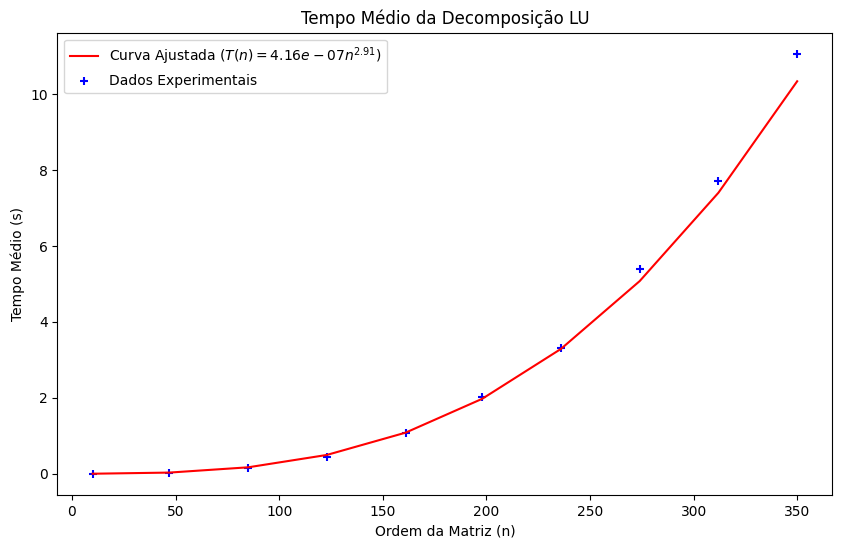

RMSE do ajuste: 2.70e-01
Coeficiente b ajustado: 2.91


In [ ]:
def ajuste_quadrados_minimos(log_n, log_tempos):
    """Ajuste por quadrados mínimos para dados linearizados.

    Args:
        log_n (numpy array): Logaritmos das ordens das matrizes.
        log_tempos (numpy array): Logaritmos dos tempos médios medidos.

    Returns:
        tuple: Coeficientes (a, b).
    """
    # Realiza o ajuste linear no espaço log-log (log_n, log_tempos)
    coef = np.polyfit(log_n, log_tempos, 1)  # Ajuste de 1º grau (reta)

    b = coef[0]
    log_a = coef[1]

    # Reverter o log de a para obter o valor de a
    a = np.exp(log_a)

    return a, b

log_n = np.log(ordens)
log_tempos = np.log(tempos_medios)

a, b = ajuste_quadrados_minimos(log_n, log_tempos)
print(f"Coeficiente a: {a:.2e}, Coeficiente b: {b:.2f}")

# Função ajustada
ajuste = lambda n: a * n**b

# Plot resultados
plt.figure(figsize=(10, 6))
plt.plot(ordens, ajuste(ordens), label=f"Curva Ajustada ($T(n) = {a:.2e}n^{{{b:.2f}}}$)", color='red')
plt.scatter(ordens, tempos_medios, label="Dados Experimentais", color='blue', marker='+')
plt.title("Tempo Médio da Decomposição LU")
plt.xlabel("Ordem da Matriz (n)")
plt.ylabel("Tempo Médio (s)")
plt.legend()
plt.show()

# Qualidade do ajuste
residuos = tempos_medios - ajuste(ordens)
rmse = np.sqrt(np.mean(residuos**2))
print(f"RMSE do ajuste: {rmse:.2e}")
print(f"Coeficiente b ajustado: {b:.2f}")